readme: <br>
TODO: create time-related variables --> month, season, etc. <br>
DONE: day feature --> can use moving average

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
os.chdir('/Users/liyuan/desktop/SI699/codes')

from reformat_data_by_day import Reformat_data
from moving_average import Moving_average

In [2]:
# load sampled data (10000 exampless)
data = pd.read_csv('../res/cleaned_sampled_data_10000.csv')
data.head()

,srch_id,date_time,site_id,visitor_location_country_id,visitor_hist_starrating,visitor_hist_adr_usd,prop_country_id,prop_id,prop_starrating,prop_review_score,...,new_comp5_rate_percent_diff,new_comp6_rate,new_comp6_inv,new_comp6_rate_percent_diff,new_comp7_rate,new_comp7_inv,new_comp7_rate_percent_diff,new_comp8_rate,new_comp8_inv,new_comp8_rate_percent_diff
0,664572,2012-11-01 00:48:02,24,216,3.375,154.12,99,84066,3,3.0,...,0,0,0,0,1,1,1,0,0,0
1,583733,2012-11-01 03:18:56,15,117,3.375,154.12,202,29484,5,5.0,...,0,0,0,0,0,0,0,0,0,0
2,649019,2012-11-01 05:47:36,5,158,3.375,154.12,219,1840,3,4.5,...,0,0,0,0,0,0,0,0,0,0
3,571848,2012-11-01 06:46:18,5,219,3.375,154.12,219,33331,3,4.0,...,0,0,0,0,0,0,0,0,1,1
4,57094,2012-11-01 07:47:43,5,219,3.375,154.12,219,28930,3,4.0,...,0,0,0,0,0,0,0,0,0,0


163.7388870146336


/anaconda3/envs/leetcode/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


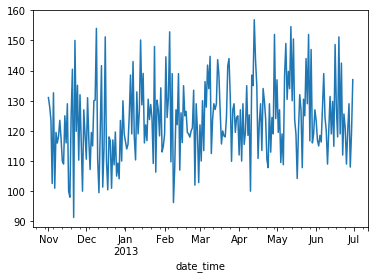

In [3]:
# TODO: further process data; only reserve time features
time_related = ['date_time','price_usd']
time_data = data[time_related]

# resample data by day
time_data['date_time'] = pd.to_datetime(time_data.date_time)
time_data = time_data.set_index('date_time')
daily_price = time_data['price_usd'].resample('D').median()

# preliminary analysis:
print(np.var(daily_price))
daily_price.plot()

test timeseries data stability ...


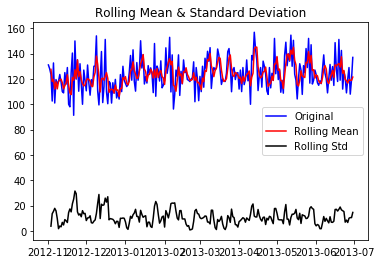

Results of Dickey-Fuller Test:
Test Statistic                -9.061108e+00
p-value                        4.560624e-15
#Lags Used                     1.000000e+00
Number of Observations Used    2.400000e+02
Critical Value (1%)           -3.457894e+00
Critical Value (5%)           -2.873659e+00
Critical Value (10%)          -2.573229e+00
dtype: float64
plot moving average ...


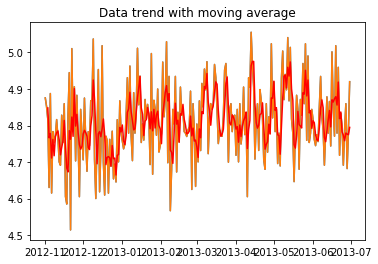

In [4]:
ma = Moving_average(daily_price)
print('test timeseries data stability ...')
ma.test_stationarity(daily_price)
# TODO: log-transform price data
timeseries_lt = ma.log_transform_timeseries()
print('plot moving average ...')
# ma.plot_moving_average(daily_price)
ma.plot_moving_average(timeseries_lt)

plot moving average difference ...


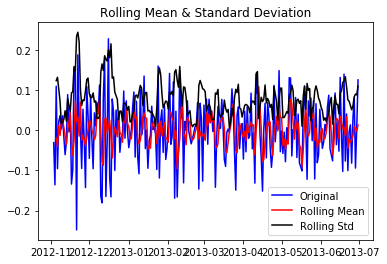

Results of Dickey-Fuller Test:
Test Statistic                -1.120069e+01
p-value                        2.247804e-20
#Lags Used                     5.000000e+00
Number of Observations Used    2.340000e+02
Critical Value (1%)           -3.458608e+00
Critical Value (5%)           -2.873972e+00
Critical Value (10%)          -2.573396e+00
dtype: float64


In [5]:
print('plot moving average difference ...')
# ma.test_moving_avg_diff(daily_price)
ma.test_moving_avg_diff(timeseries_lt)

plot exponentially weighted moving average ..


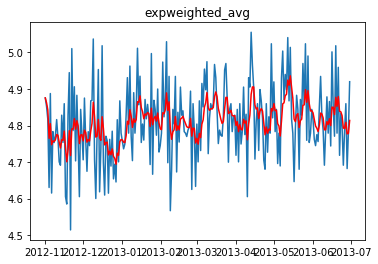

In [6]:
print('plot exponentially weighted moving average ..')
# ma.expweighted_moving_avg(daily_price)
ma.expweighted_moving_avg(timeseries_lt)

remove seasonality effect and test stability...


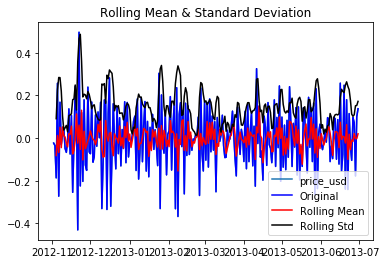

Results of Dickey-Fuller Test:
Test Statistic                -7.608387e+00
p-value                        2.289655e-11
#Lags Used                     1.200000e+01
Number of Observations Used    2.280000e+02
Critical Value (1%)           -3.459361e+00
Critical Value (5%)           -2.874302e+00
Critical Value (10%)          -2.573571e+00
dtype: float64


In [9]:
print('remove seasonality effect and test stability...')
ma.remove_seasonality(timeseries_lt)
# p-value is quite large, so the timeseries is not stable

another way of plotting ACF ...


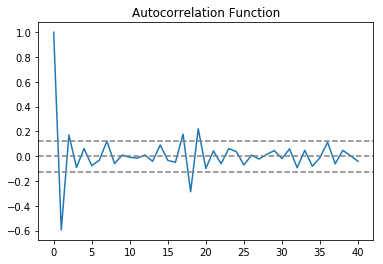

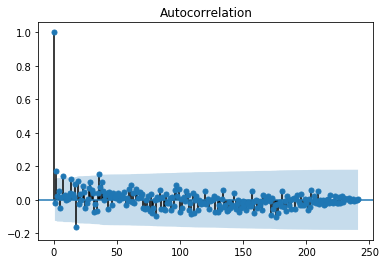

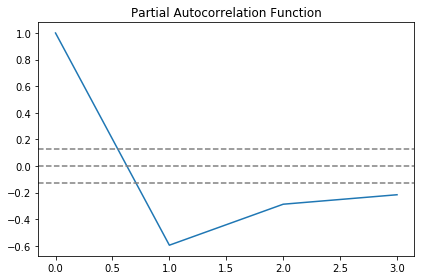

In [10]:
ma.test_autocorrelation()

interpretation of ACF/PACF: https://newonlinecourses.science.psu.edu/stat462/node/188/ <br>
1) the more PACF deviate from 0, the stronger the correlation shows (positive --> postive correlation; negative --> negative correlation)<br>
2) x axis represents the time lag

/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
/anaconda3/envs/leetcode/lib/python3.6/site-packages/scipy/signal/signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this 

date_time
2012-11-01    131.045000
2012-11-02    131.032443
2012-11-03    132.854211
2012-11-04    137.343106
2012-11-05    159.905789
Freq: D, dtype: float64

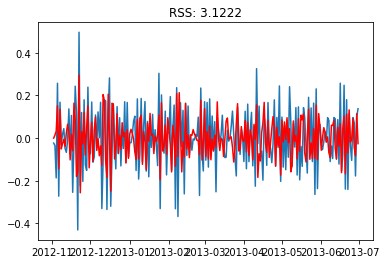

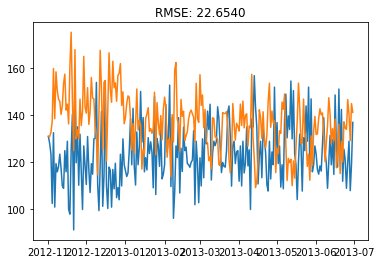

In [11]:
# AR model
plt.figure(1)
predictions_AR = ma.fit_AR_model()
plt.figure(2)
predictions_AR_convert = ma.get_prediction(predictions_AR)
predictions_AR_convert.head()

date_time
2012-11-01    131.045000
2012-11-02    131.084821
2012-11-03    132.695309
2012-11-04    136.985329
2012-11-05    161.419360
Freq: D, dtype: float64

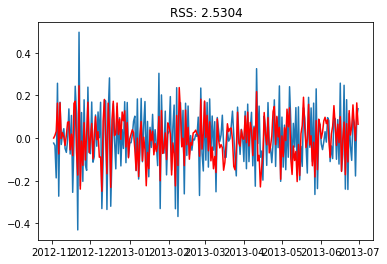

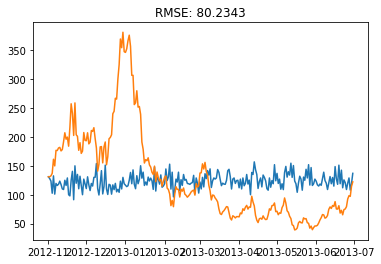

In [12]:
# MA model
# only sliding window set to 1 could work based on this dataset
plt.figure(1)
predictions_MA = ma.fit_MA_model(sliding_window=1)
plt.figure(2)
predictions_MA_convert = ma.get_prediction(predictions_MA) 
predictions_MA_convert.head()

date_time
2012-11-01    131.045000
2012-11-02    131.084535
2012-11-03    132.988559
2012-11-04    137.585386
2012-11-05    164.067098
Freq: D, dtype: float64

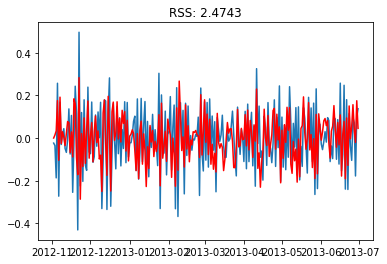

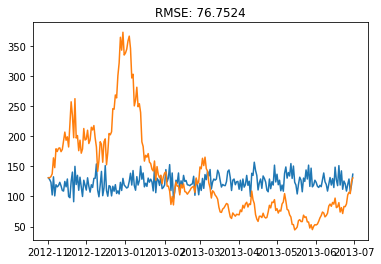

In [13]:
# ARIMA
plt.figure(1)
predictions_ARIMA = ma.fit_ARIMA_model()
plt.figure(2)
predictions_ARIMA_convert = ma.get_prediction(predictions_ARIMA)
predictions_ARIMA_convert.head()

AR model is best model among the three modeling methods (RMSE:22.65)

TODO: timeseries parameter tuning